In [1]:
%matplotlib inline
!ls imagery/henning | grep tif

20170106.tif
20170106.tif.aux.xml
20170112.tif
20170118.tif
20170124.tif
20170130.tif
20170205.tif
20170211.tif
20170217.tif
20170223.tif
20170301.tif
20170307.tif
20170313.tif
20170319.tif
20170325.tif
20170331.tif
20170406.tif
20170412.tif
20170418.tif
20170424.tif
20170430.tif
20170506.tif
20170512.tif
20170518.tif
20170524.tif
20170530.tif
20170605.tif
20170611.tif
20170617.tif
20170623.tif
20170629.tif
20170705.tif
20170711.tif
20170717.tif
20170723.tif
20170729.tif
20170804.tif
20170810.tif
20170816.tif
20170822.tif
20170828.tif
20170903.tif
20170909.tif
20170915.tif
20170921.tif
20170927.tif
20171003.tif
20171009.tif
20171015.tif
20171021.tif
20171027.tif
20171102.tif
20171108.tif
20171114.tif
20171120.tif
20171126.tif
20171202.tif
20171208.tif
20171214.tif
20171220.tif
20171226.tif
EarthEngineImages-allanpvQ.tif
EarthEngineImages-allan.tif
EarthEngineImages-s1_dual_3pt5.tif
EarthEngineImages-s1_dual_4pt0.tif
EarthEngineImages-s1_dual_5pt2.tif
EarthEngineImages-s1_grd_4pt4.tif
e

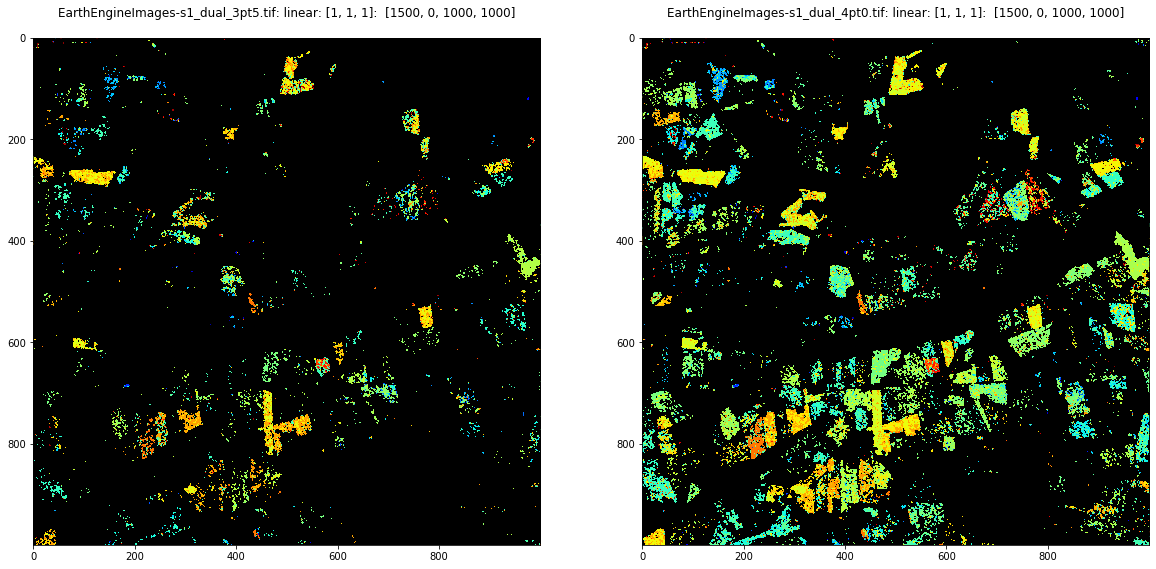

In [11]:
%run scripts/dispms -f imagery/henning/EarthEngineImages-s1_dual_3pt5.tif -c -d [1500,0,1000,1000] \
-F imagery/henning/EarthEngineImages-s1_dual_4pt0.tif -C -D [1500,0,1000,1000] \
-s '/home/mort/LaTeX/new projects/henning/fig1.png'

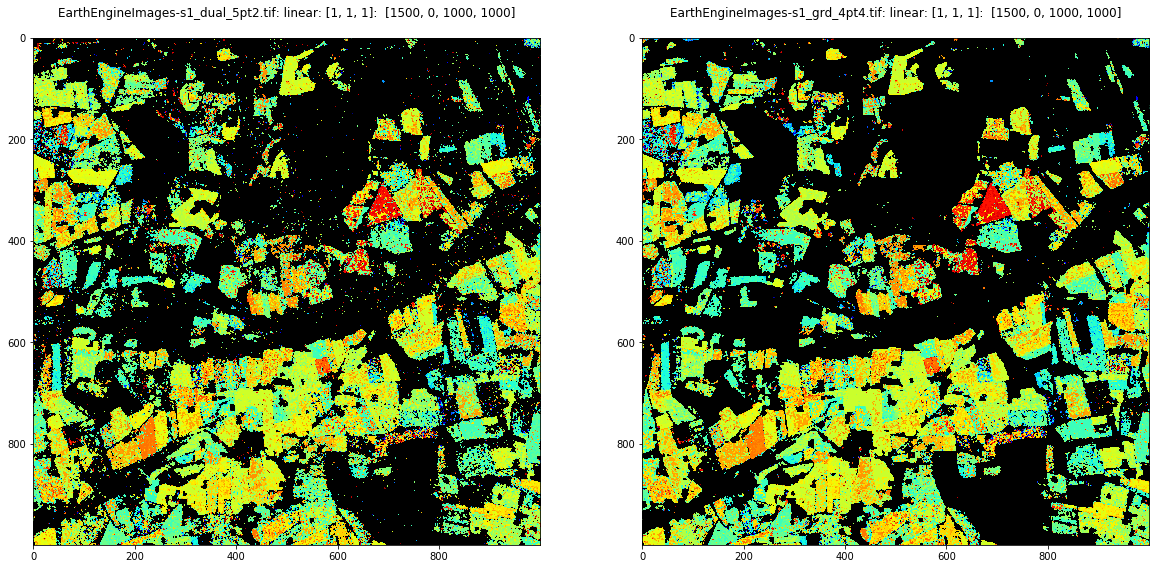

In [10]:
%run scripts/dispms -f imagery/henning/EarthEngineImages-s1_dual_5pt2.tif -c -d [1500,0,1000,1000] \
-F imagery/henning/EarthEngineImages-s1_grd_4pt4.tif -C -D [1500,0,1000,1000] \
-s '/home/mort/LaTeX/new projects/henning/fig2.png'

In [68]:
%run scripts/envi2tif imagery/henning/20171226

GeoTiff image written to: imagery/henning/20171226.tif


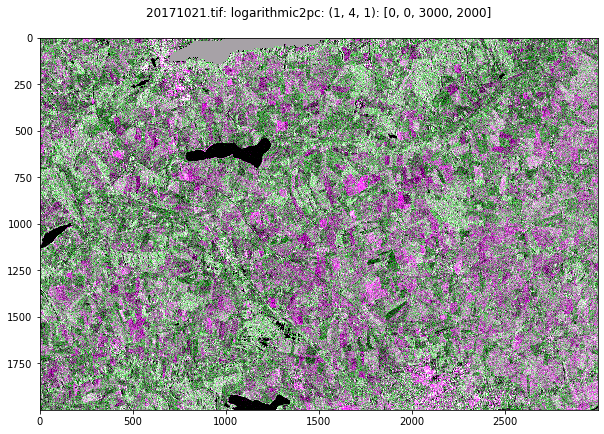

In [8]:
%run scripts/dispms -f imagery/henning/20171021.tif -p [1,4,1] -e 5 

     ENL Estimation
Sat Jul  4 13:12:04 2020
infile:  imagery/henning/20171021.tif
Dual polarimetry
filtering...
row: 100 200 300 400 500 600 700 800 900 
Mode: 5.589600


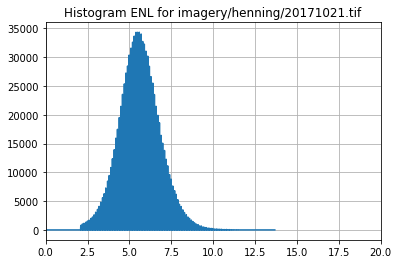

elapsed time: 87.96531581878662


In [70]:
%run auxil/enlml -d [1500,0,1000,1000] -x 20  imagery/henning/20171021.tif

__simulation of 5 looks__

In [28]:
import numpy as np
from osgeo import gdal
from osgeo.gdalconst import GDT_Float32

m = 5
simimage = np.zeros((1000**2,9))
for i in range(1000**2):
    if i % 50000 == 0:
        print(i,end=' ')
    X = np.mat(np.random.randn(m,2))
    Y = np.mat(np.random.randn(m,2))
    Wr = X.T*X + Y.T*Y
    Wi = X.T*Y - Y.T*X
    W = (Wr - 1j*Wi)/2
    simimage[i,0] = np.real(W[0,0])
    simimage[i,1] = np.real(W[0,1])
    simimage[i,2] = np.imag(W[0,1])
    simimage[i,3] = np.real(W[1,1])
driver = gdal.GetDriverByName('GTiff')    
outDataset = driver.Create('imagery/henning/enlsim.tif',1000,1000,4,GDT_Float32) 
for i in range(4):
    outBand = outDataset.GetRasterBand(i+1)
    outBand.WriteArray(np.reshape(simimage[:,i],(1000,1000)),0,0) 
    outBand.FlushCache()  
outDataset = None    
print('Done')

0 50000 100000 150000 200000 250000 300000 350000 400000 450000 500000 550000 600000 650000 700000 750000 800000 850000 900000 950000 Done


     ENL Estimation
Thu Jul  2 18:44:29 2020
infile:  imagery/henning/enlsim.tif
Dual polarimetry
filtering...
row: 100 200 300 400 500 600 700 800 900 
Mode: 5.100000

Plot saved to imagery/henning/enlsim.png



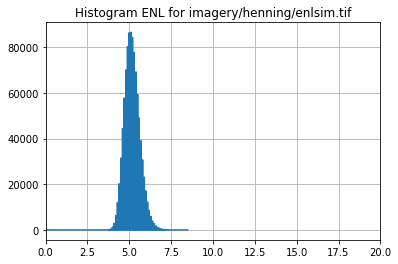

elapsed time: 94.82455706596375


In [33]:
%run auxil/enlml  -x 20 -s 'imagery/henning/enlsim.png' imagery/henning/enlsim.tif

In [7]:
!gdalinfo -stats imagery/henning/20170106.tif

Driver: GTiff/GeoTIFF
Files: imagery/henning/20170106.tif
Size is 3000, 2000
Coordinate System is:
PROJCS["UTM_Zone_32_European_Terrestrial_Reference_System_1989",
    GEOGCS["GCS_European Terrestrial Reference System 1989",
        DATUM["European_Terrestrial_Reference_System_1989",
            SPHEROID["GRS_1980",6378137,298.257222101]],
        PRIMEM["Greenwich",0],
        UNIT["degree",0.0174532925199433]],
    PROJECTION["Transverse_Mercator"],
    PARAMETER["latitude_of_origin",0],
    PARAMETER["central_meridian",9],
    PARAMETER["scale_factor",0.9996],
    PARAMETER["false_easting",500000],
    PARAMETER["false_northing",0],
    UNIT["metre",1,
        AUTHORITY["EPSG","9001"]]]
Origin = (542105.768108944990672,6278635.826231479644775)
Pixel Size = (10.000000000000000,-10.000000000000000)
Metadata:
  AREA_OR_POINT=Area
Image Structure Metadata:
  INTERLEAVE=PIXEL
Corner Coordinates:
Upper Left  (  542105.768, 6278635.826) (  9d41'12.11"E, 56d38'59.95"N)
Lower Left  (  542105

In [2]:
!ls imagery/henning

20170106_enl.png		   20170804.tif
20170106.tif			   20170810.tif
20170106.tif.aux.xml		   20170816.tif
20170106_vvvv_ml_gec.envi.aux.xml  20170822.tif
20170112.tif			   20170828.tif
20170118.tif			   20170903.tif
20170124.tif			   20170909.tif
20170130.tif			   20170915.tif
20170205.tif			   20170921.tif
20170211.tif			   20170927.tif
20170217.tif			   20171003.tif
20170223.tif			   20171009.tif
20170301.tif			   20171015.tif
20170307.tif			   20171021.tif
20170313.tif			   20171027.tif
20170319.tif			   20171102.tif
20170325.tif			   20171108.tif
20170331.tif			   20171114.tif
20170406.tif			   20171120.tif
20170412.tif			   20171126.tif
20170418.tif			   20171202.tif
20170424.tif			   20171208.tif
20170430.tif			   20171214.tif
20170506.tif			   20171220.tif
20170512.tif			   20171226.tif
20170518.tif			   EarthEngineImages-allanpvQ.tif
20170524.tif			   EarthEngineImages-allan.tif
20170530.tif			   EarthEngineImages-s1_dual_3pt5.csv
20170605.tif			   EarthEngineImages-s1_dual_3pt5.t

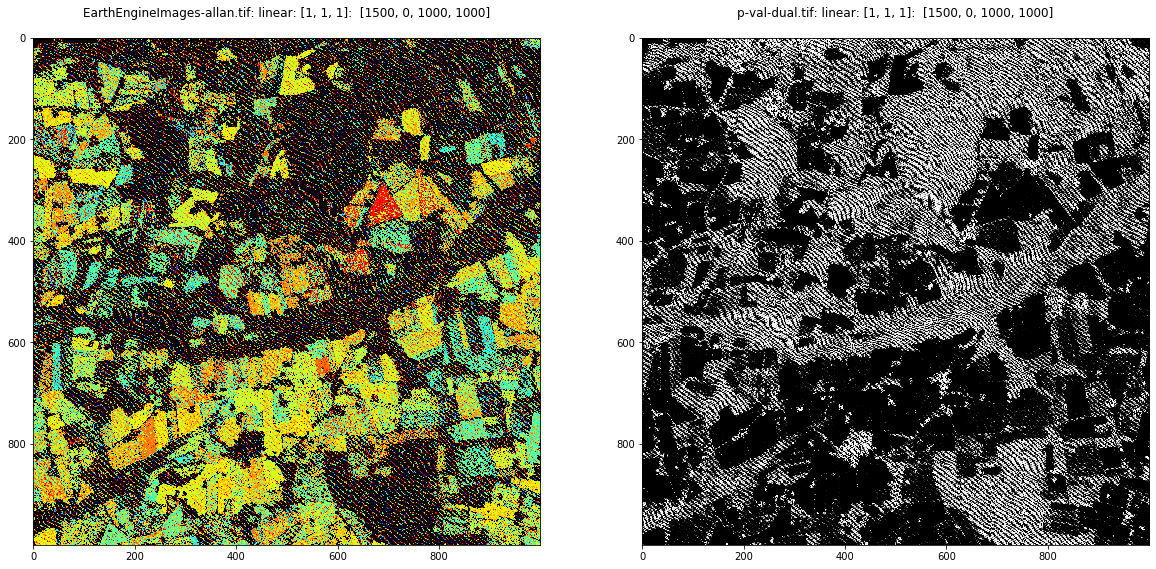

In [6]:
%run scripts/dispms -f imagery/henning/EarthEngineImages-allan.tif -c -d [1500,0,1000,1000] \
-F imagery/henning/p-val-dual.tif -E 2 -D [1500,0,1000,1000] \
-s '/home/mort/LaTeX/new projects/henning/fig1a.png'

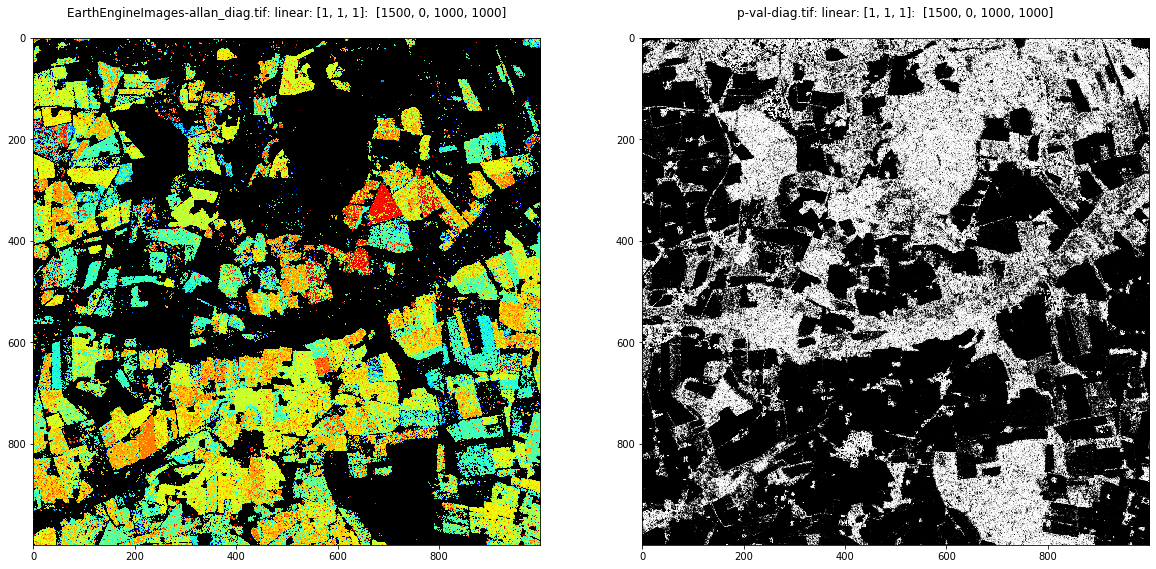

In [7]:
%run scripts/dispms -f imagery/henning/EarthEngineImages-allan_diag.tif -c -d [1500,0,1000,1000] \
-F imagery/henning/p-val-diag.tif -E 2 -D [1500,0,1000,1000] \
-s '/home/mort/LaTeX/new projects/henning/fig2a.png'